In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import pathlib

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm


In [44]:
uzh_color_map = ['#0028a5', '#dc6027', '#91c34a', '#fede00', '#a3adb7', '#0b82a0', '#2a7f62', # FULL
                 '#667ec9', '#eaa07d', '#bfdf94', '#fcec7c', '#c8ced4', '#6bb7c7', '#80b6a4', # 60%
                 '#3353b7', '#e38052', '#aad470', '#fbe651', '#b5bdc5', '#3c9fb6', '#569d85', # 80%
                 '#99a9db', '#f1bfa9', '#d5e9b7', '#fdf3a8', '#dadee2', '#9ed0d9', '#abcec2', # 40%
                 '#ccd4ed', '#f8dfd4', '#eaf4db', '#fef9d3', '#edeff1', '#cfe8ec', '#d5e7e1'] # 20%

uzh_colors = {'blue': '#0028a5', 'blue_80': '#3353b7', 'blue_60': '#667ec9', 'blue_40': '#99a9db', 'blue_20': '#ccd4ed',
               'red': '#dc6027', 'red_80': '#e38052', 'red_60': '#eaa07d', 'red_40': '#f1bfa9', 'red_20': '#f8dfd4',
               'green': '#91c34a', 'green_80': '#aad470', 'green_60': '#bfdf94', 'green_40': '#d5e9b7', 'green_20': '#eaf4db',
               'yellow': '#fede00', 'yellow_80': '#fbe651', 'yellow_60': '#fcec7c', 'yellow_40': '#fdf3a8', 'yellow_20': '#fef9d3',
               'grey': '#a3adb7', 'grey_80': '#b5bdc5', 'grey_60': '#c8ced4', 'grey_40': '#dadee2', 'grey_20': '#edeff1',
               'turquoise': '#0b82a0', 'turquoise_80': '#3c9fb6', 'turquoise_60': '#6bb7c7', 'turquoise_40': '#9ed0d9', 'turquoise_20': '#cfe8ec',
               'green2': '#2a7f62', 'green2_80': '#569d85', 'green2_60': '#80b6a4', 'green2_40': '#abcec2', 'green2_20': '#d5e7e1'}

font_path = './Fonts/TheSans Plain.otf'
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)


In [45]:
plt.rcParams.update({
                        'text.usetex': False,
                        'font.family': 'sans-serif',
                        'font.sans-serif' : prop.get_name(),
                        'axes.labelsize' : 16,
                        'font.size' : 12,
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False,
                        'axes.formatter.use_mathtext': True,
                    })

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=uzh_color_map)


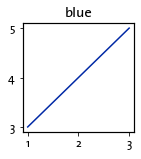

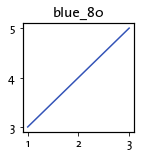

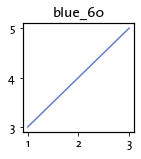

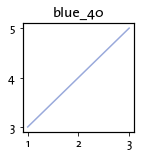

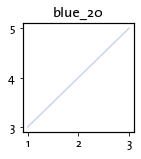

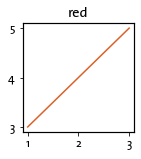

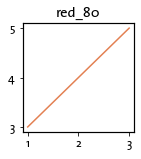

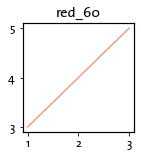

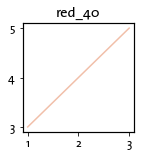

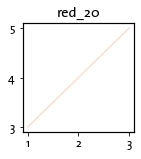

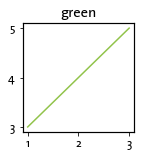

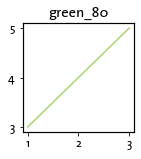

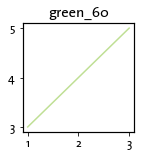

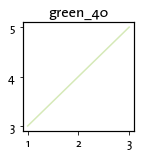

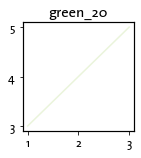

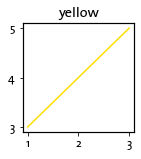

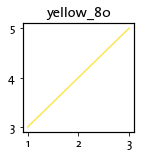

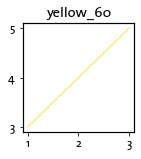

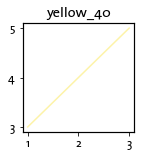

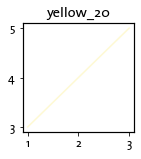

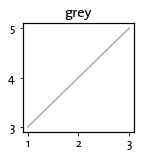

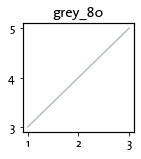

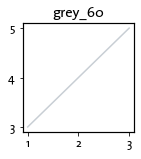

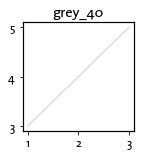

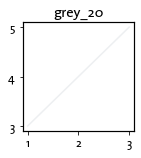

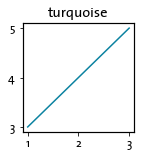

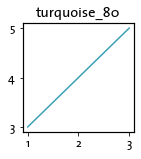

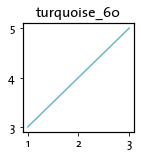

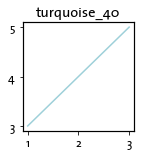

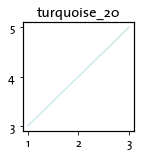

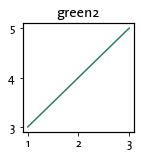

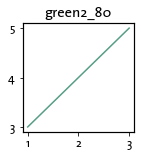

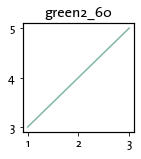

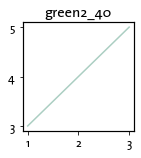

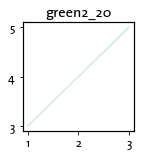

In [46]:
x = [1,2,3]
y = [3,4,5]
for col in uzh_colors.keys():
    plt.figure(figsize=(2,2))
    plt.plot(x, y, color = uzh_colors[col])
    plt.title(col)


In [47]:
def plot_girvan_newmann_metrics(x, y, xlabel, ylabel, title, colour, save_fig_filepath):
    plt.figure(figsize=(5,5))
    plt.plot(x, y, '-ok', color = uzh_colors[colour])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.minorticks_off()
    plt.tight_layout()
    plt.savefig(save_fig_filepath, facecolor='white')
    return


In [48]:
def main(i, wt, modularity_df, save_dir):
    
    plot_girvan_newmann_metrics(
                                    modularity_df['new_modularity'].index, 
                                    modularity_df['new_modularity'], 
                                    "Iterations \n ({} graph)".format(wt.capitalize()), 
                                    'Modularity', 
                                    'Original Modularity: {} \n Num of unique entities: {}'.format(round(modularity_df['original_modularity'][0], 4), modularity_df['num_of_unique_entities_in_comp'][0]),                                             
                                    'blue', 
                                    save_dir +'_modularity.png'
                                )
    plot_girvan_newmann_metrics(
                                    modularity_df['count_of_known_entites'].index, 
                                    modularity_df['count_of_known_entites'], 
                                    "Iterations \n ({} graph)".format(wt.capitalize()), 
                                    'Count of addresses with known entities', 
                                    'Num of unique entities: {} \n Total num of addresses: {}'.format(modularity_df['num_of_unique_entities_in_comp'][0], modularity_df['total_num_of_addresses_in_comp'][0]),                                             
                                    'red', 
                                    save_dir +'_count_of_known_entites.png'
                                )
    plot_girvan_newmann_metrics(
                                    modularity_df['total edge splits'], 
                                    modularity_df['number_of_components'], 
                                    "Total edge splits \n ({} graph)".format(wt.capitalize()), 
                                    'Number of Components', 
                                    'Number of Components \ngenerated with edge splits',                             
                                    'green', 
                                    save_dir +'_edge_splits_vs_components.png'
                                )
    plot_girvan_newmann_metrics(
                                    modularity_df['total edge splits'], 
                                    modularity_df['number_of_communities'], 
                                    "Total edge splits \n ({} graph)".format(wt.capitalize()), 
                                    'Number of Communities', 
                                    'Number of Communities \ngenerated with edge splits',                             
                                    'yellow', 
                                    save_dir +'_edge_splits_vs_communites.png'
                                )
    plot_girvan_newmann_metrics(
                                    modularity_df['total edge splits'], 
                                    modularity_df['new_modularity'], 
                                    "Total edge splits \n ({} graph)".format(wt.capitalize()), 
                                    'Modularity', 
                                    'Original Modularity: {}'.format(round(modularity_df['original_modularity'][0], 4)),                      
                                    'grey', 
                                    save_dir +'_edge_splits_vs_modularity.png'
                                )
    plot_girvan_newmann_metrics(
                                    modularity_df['number_of_components'], 
                                    modularity_df['new_modularity'], 
                                    'number_of_components', 
                                    'Modularity', 
                                    'Original Modularity: {}'.format(round(modularity_df['original_modularity'][0], 4)),                      
                                    'grey', 
                                    save_dir +'_comp_mod.png'
                                )


    metrics = ['ami', 'ars', 'urs', 'homog']
    metric_names = ['AMI', 'ARI', 'RI', 'Homogeneity']
    colurs = ['blue_60', 'turquoise_60', 'yellow_80', 'turquoise']
    for j in range(len(metrics)):
        plot_girvan_newmann_metrics(
                                        modularity_df['iter_idx'], 
                                        modularity_df[metrics[j]], 
                                        "Iterations \n ({} graph)".format(wt.capitalize()), 
                                        metric_names[j],
                                        '',
                                        colurs[j], 
                                        save_dir + metrics[j] + '.png'
                                    ) 



****  btc_2012_0_h0_h1_comp_0_modularity.csv  ****
****  btc_2012_0_h0_h1_wt_comp_0_modularity.csv  ****
****  btc_2012_1_h0_h1_comp_0_modularity.csv  ****
****  btc_2012_1_h0_h1_wt_comp_0_modularity.csv  ****
****  btc_2012_2_h0_h1_comp_0_modularity.csv  ****
****  btc_2012_2_h0_h1_wt_comp_0_modularity.csv  ****
****  btc_2012_6_h0_h1_comp_0_modularity.csv  ****
****  btc_2012_6_h0_h1_wt_comp_0_modularity.csv  ****
****  btc_2012_7_h0_h1_comp_0_modularity.csv  ****
****  btc_2012_7_h0_h1_wt_comp_0_modularity.csv  ****
****  btc_2012_8_h0_h1_comp_0_modularity.csv  ****
****  btc_2012_8_h0_h1_wt_comp_0_modularity.csv  ****


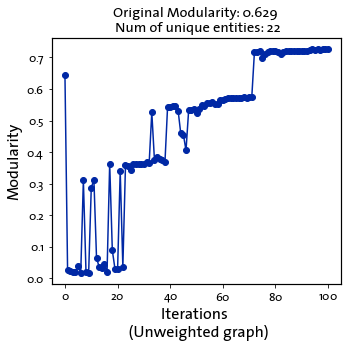

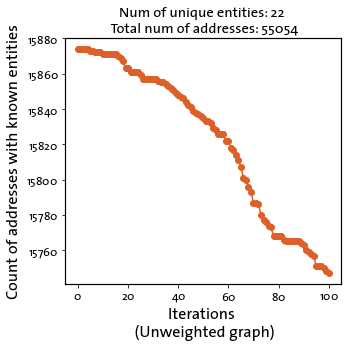

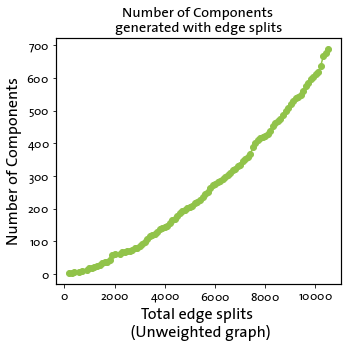

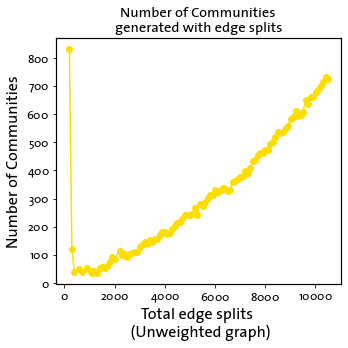

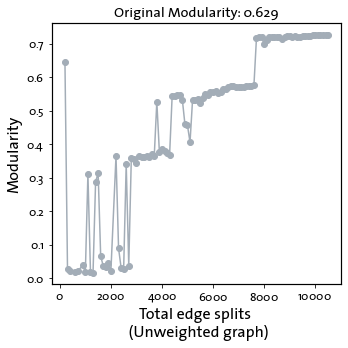

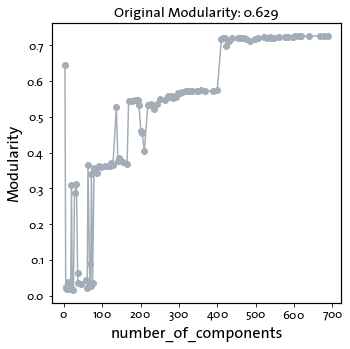

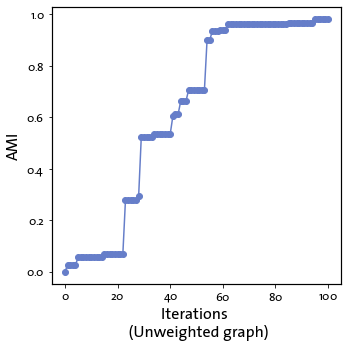

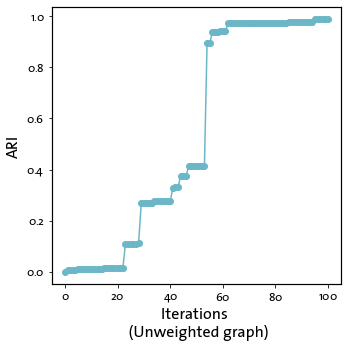

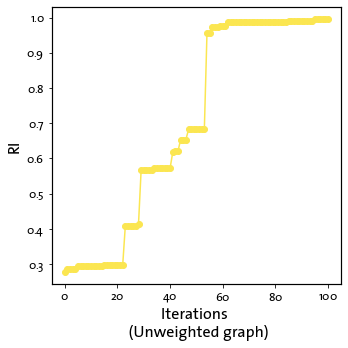

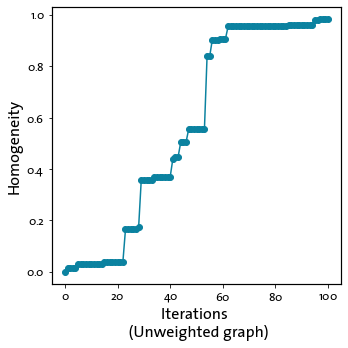

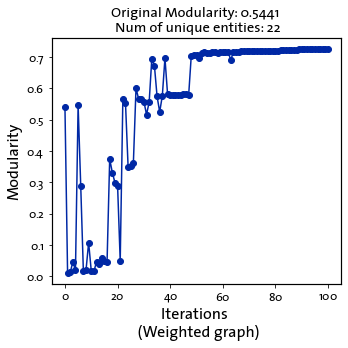

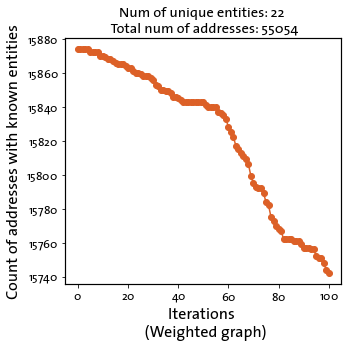

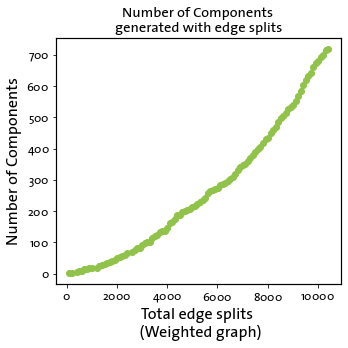

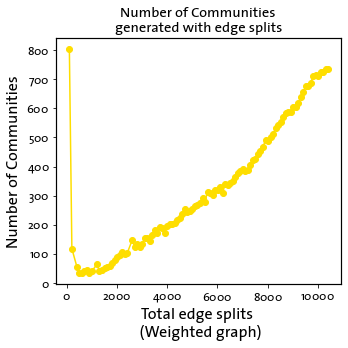

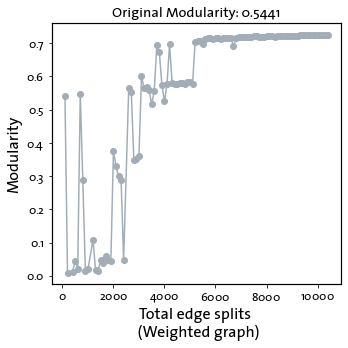

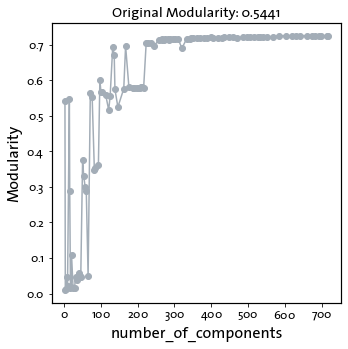

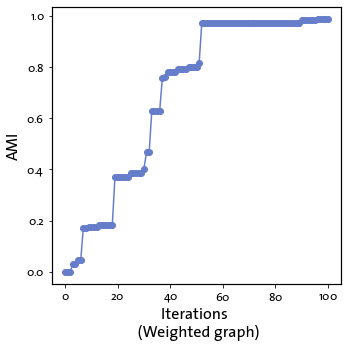

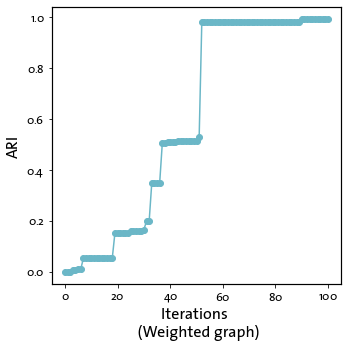

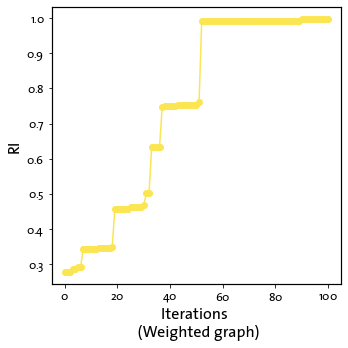

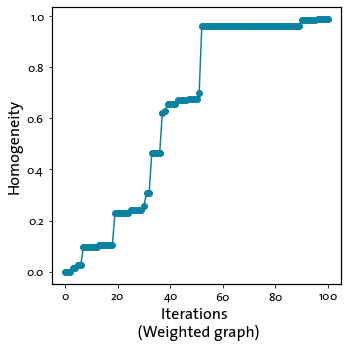

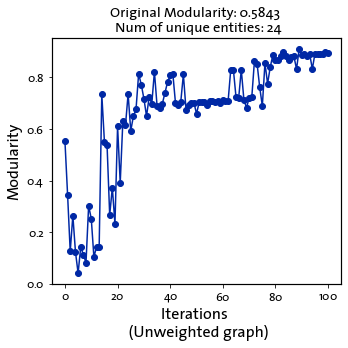

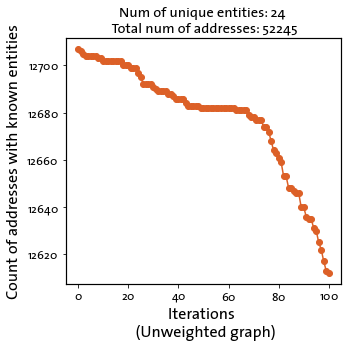

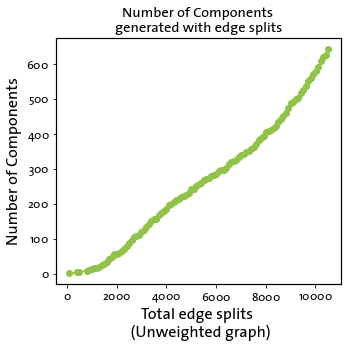

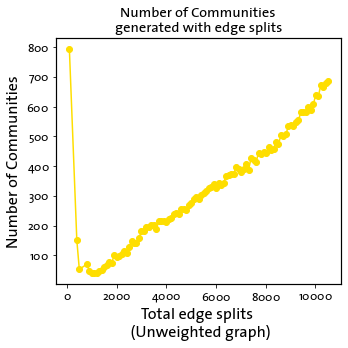

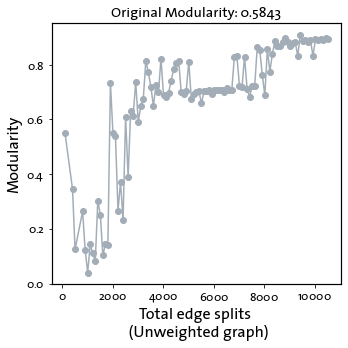

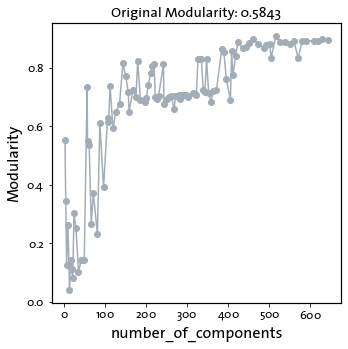

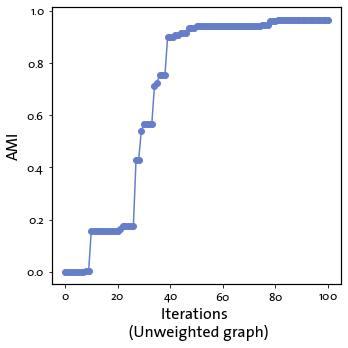

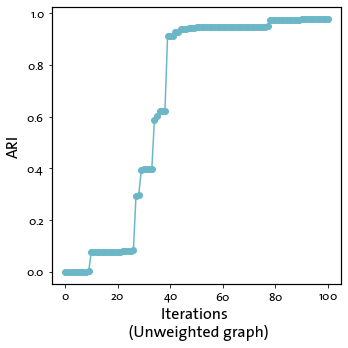

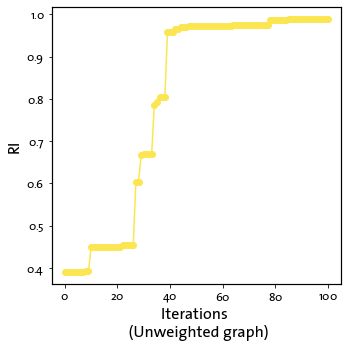

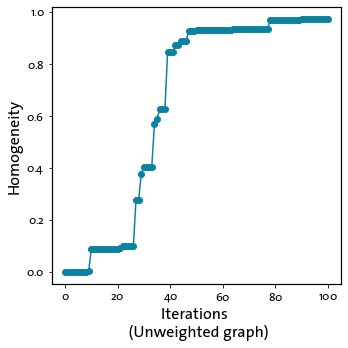

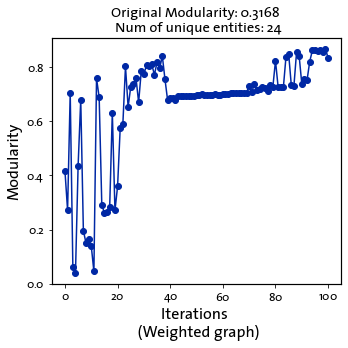

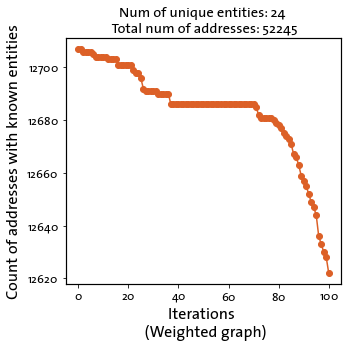

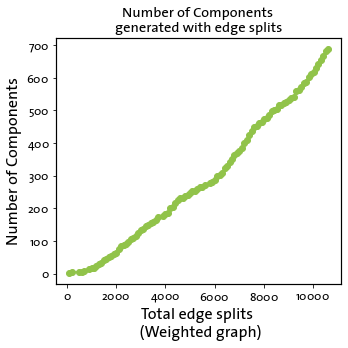

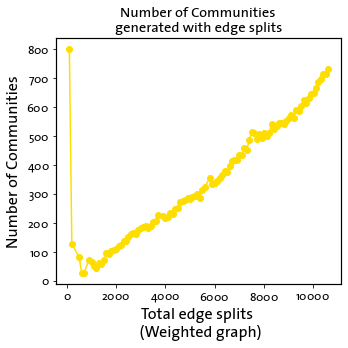

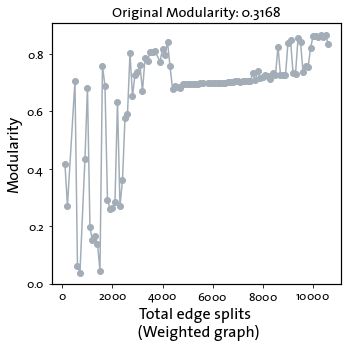

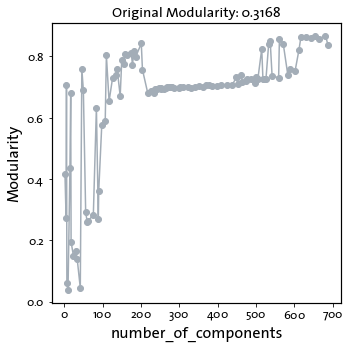

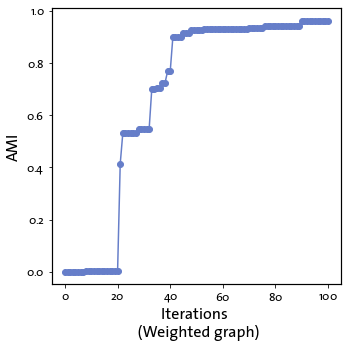

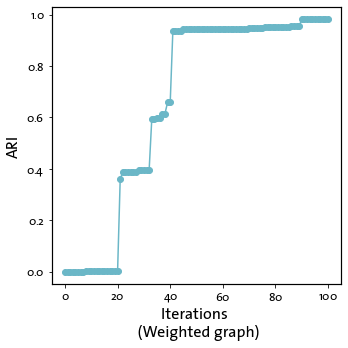

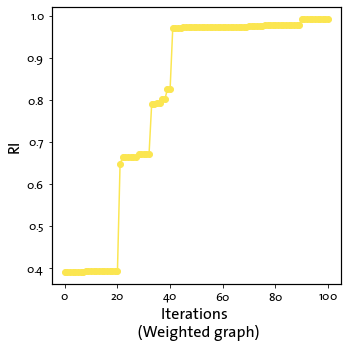

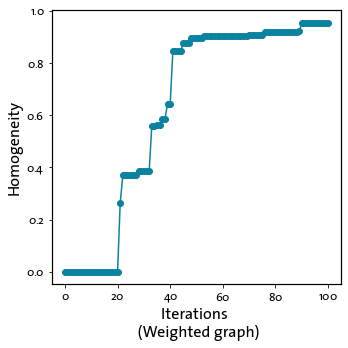

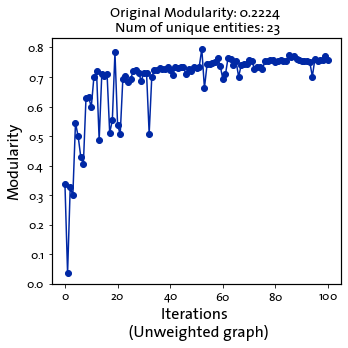

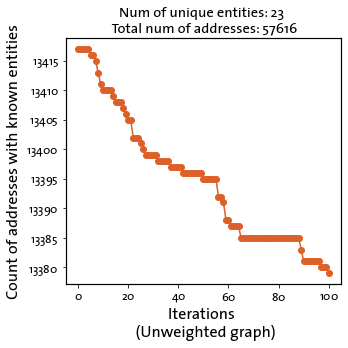

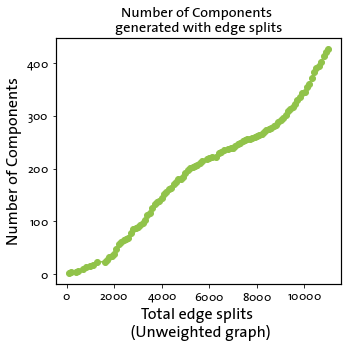

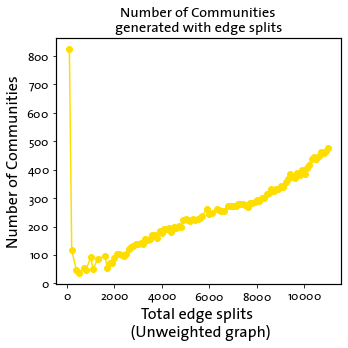

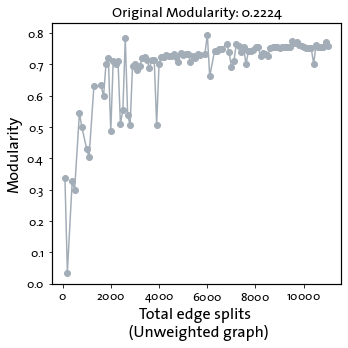

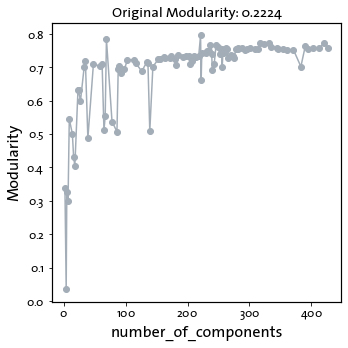

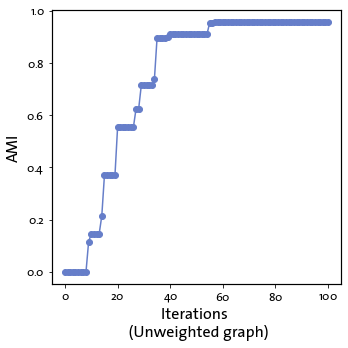

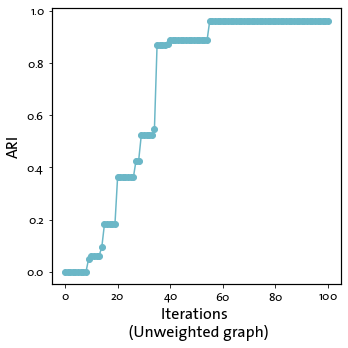

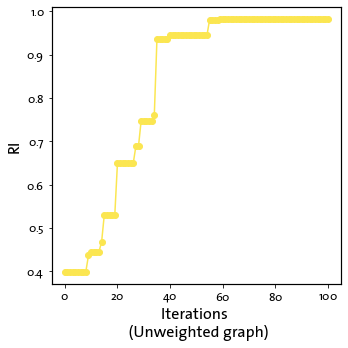

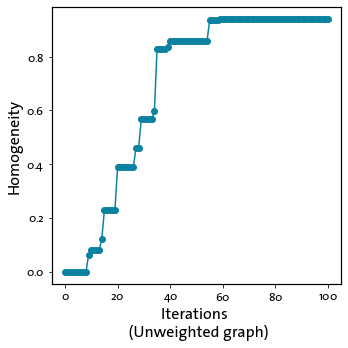

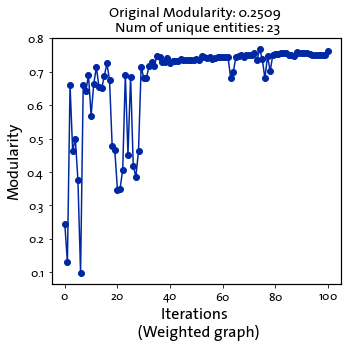

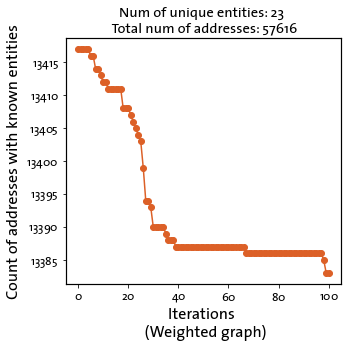

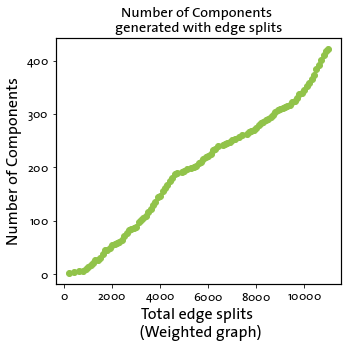

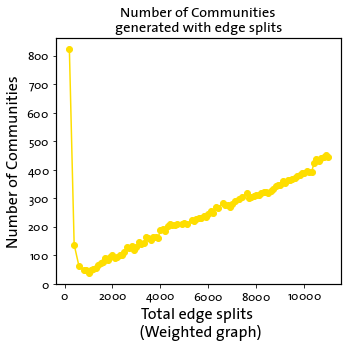

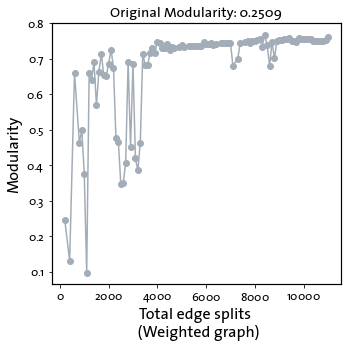

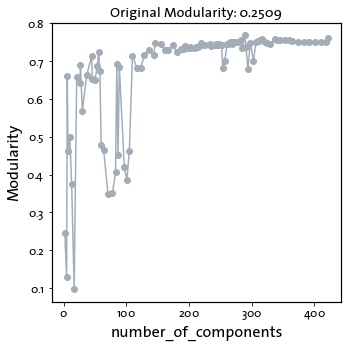

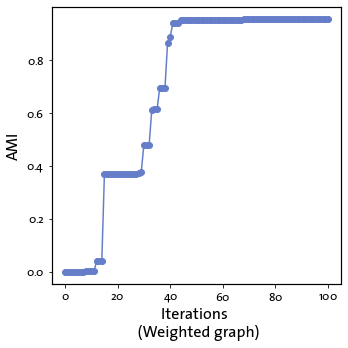

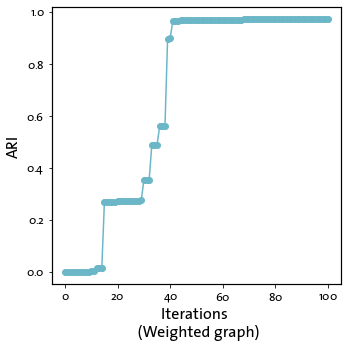

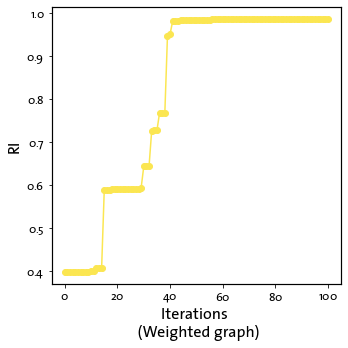

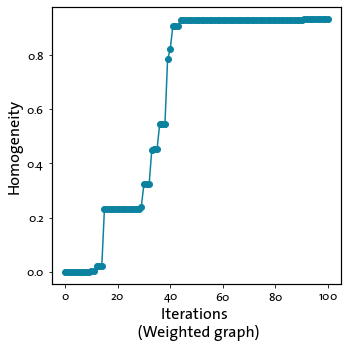

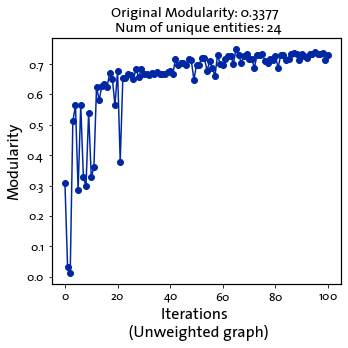

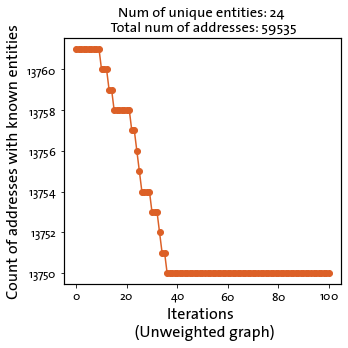

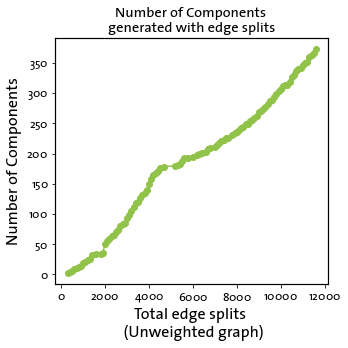

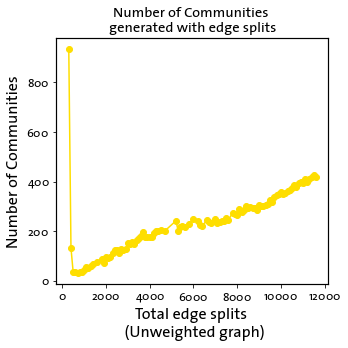

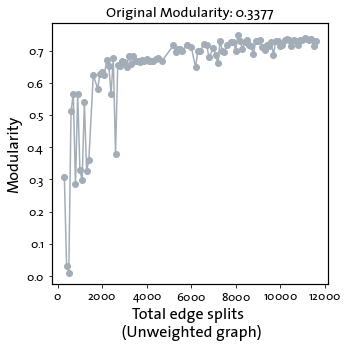

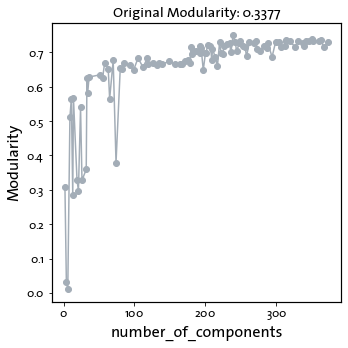

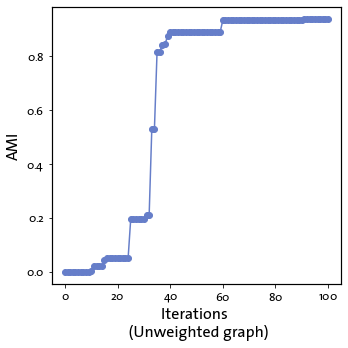

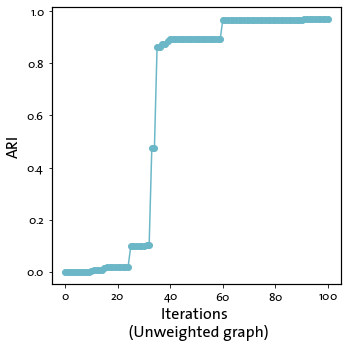

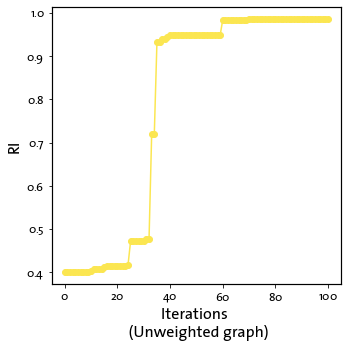

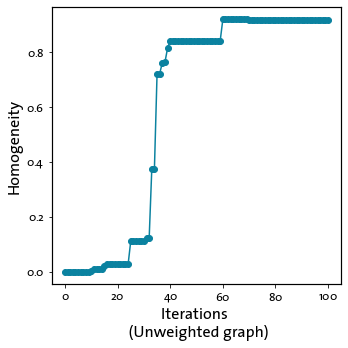

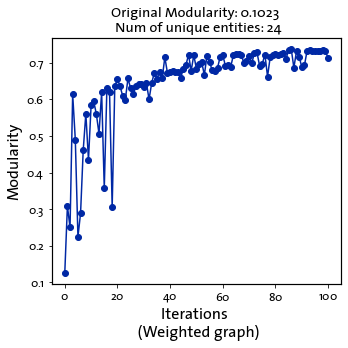

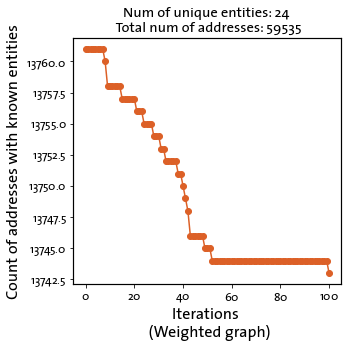

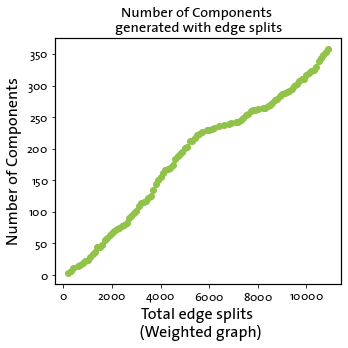

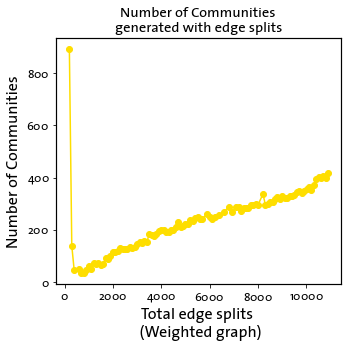

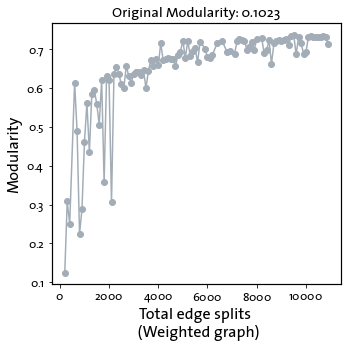

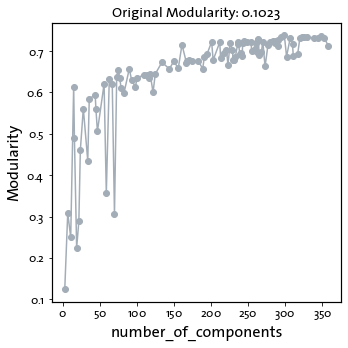

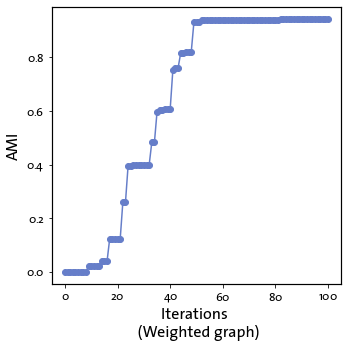

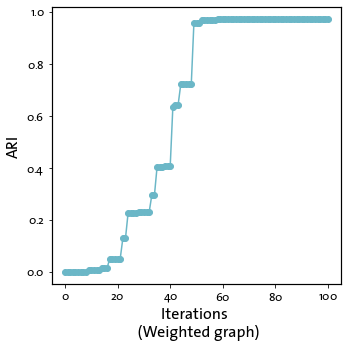

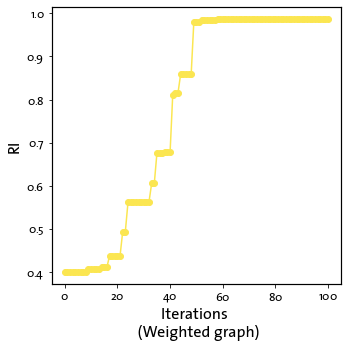

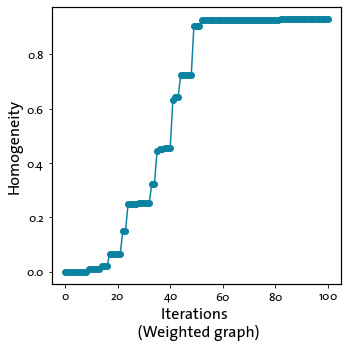

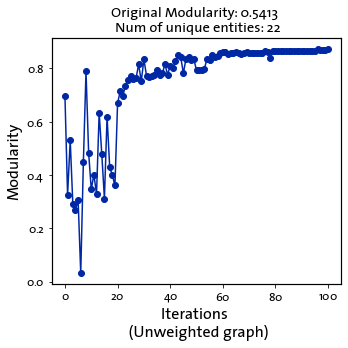

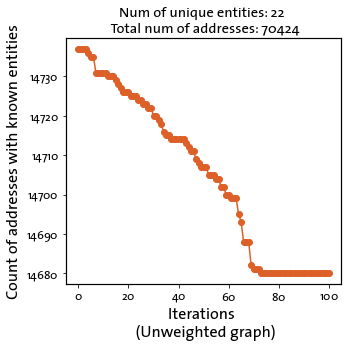

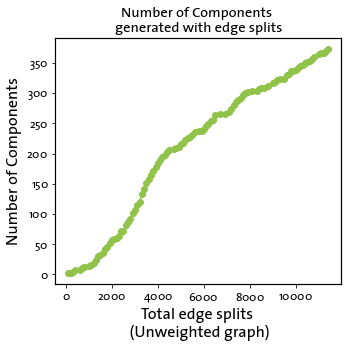

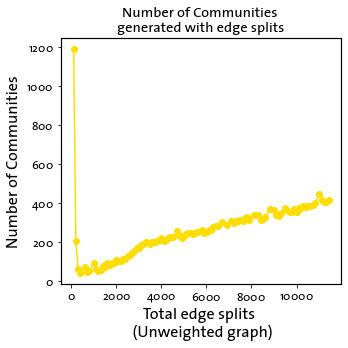

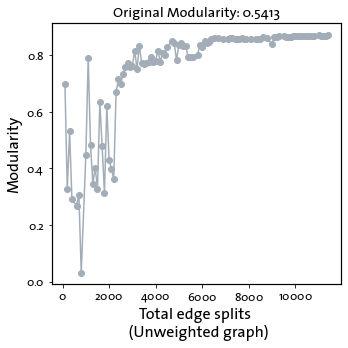

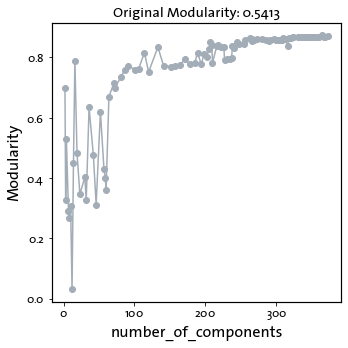

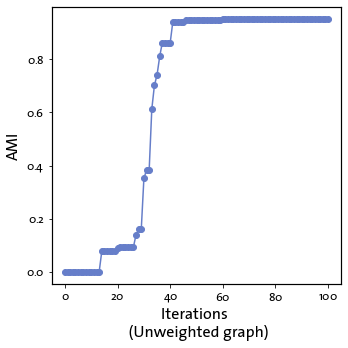

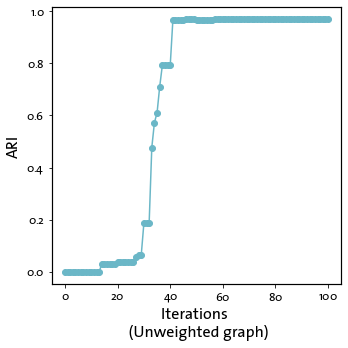

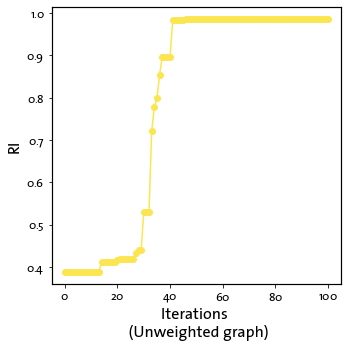

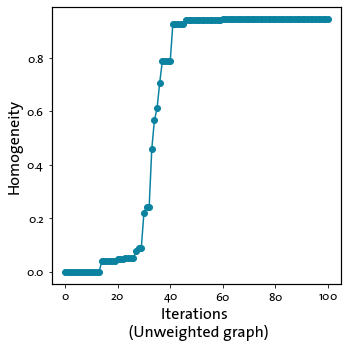

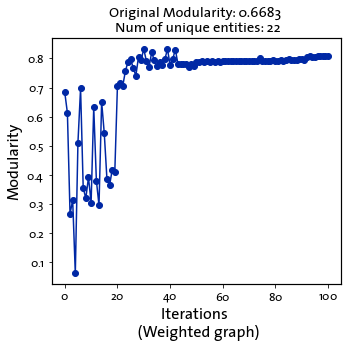

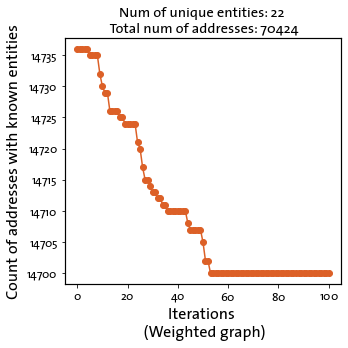

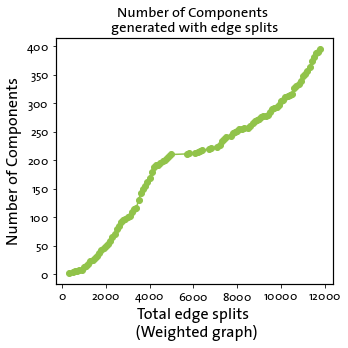

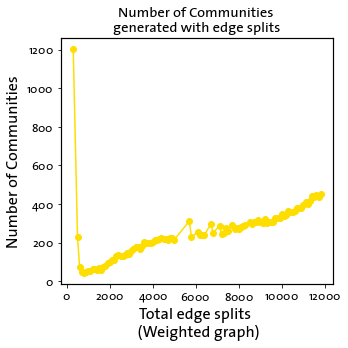

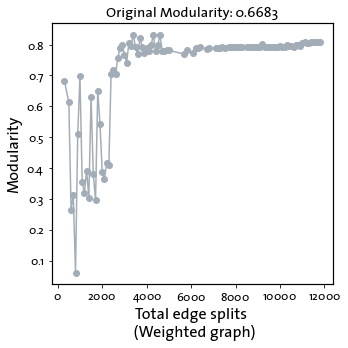

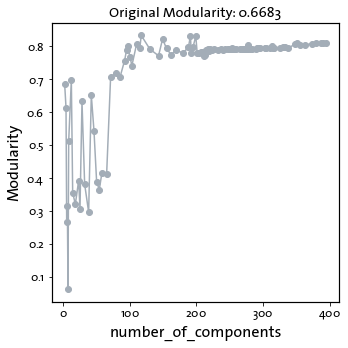

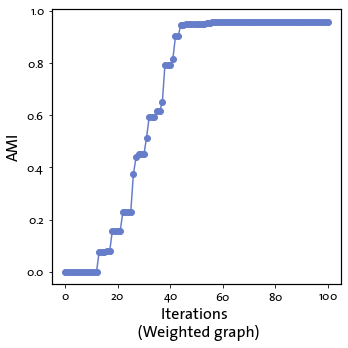

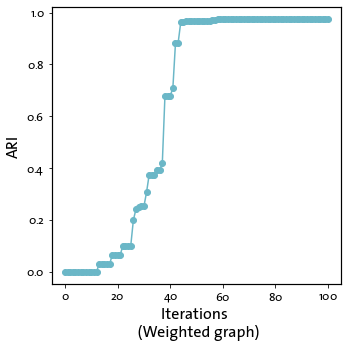

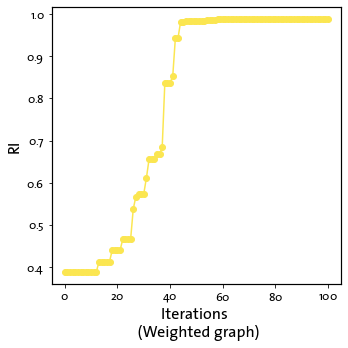

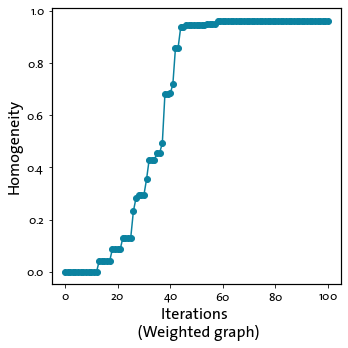

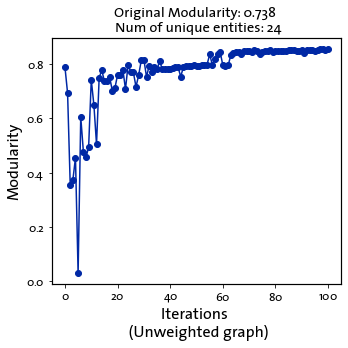

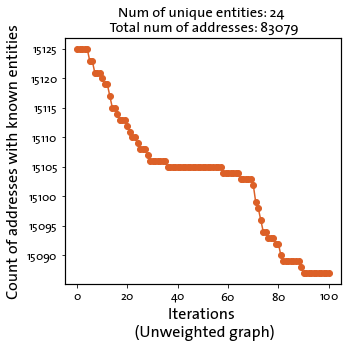

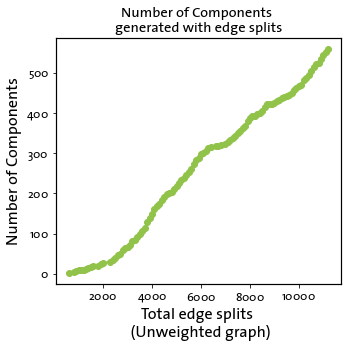

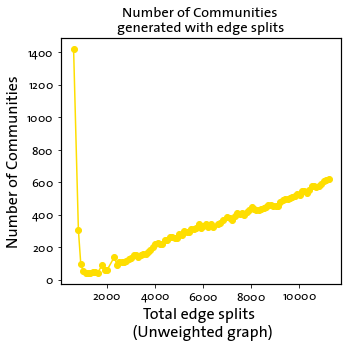

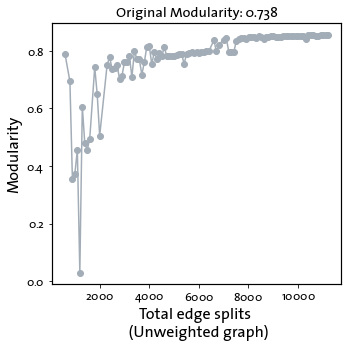

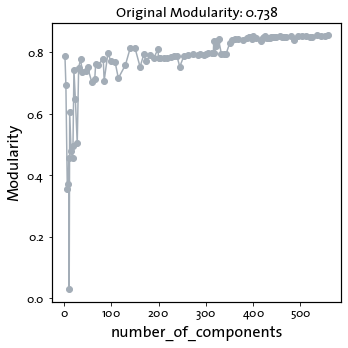

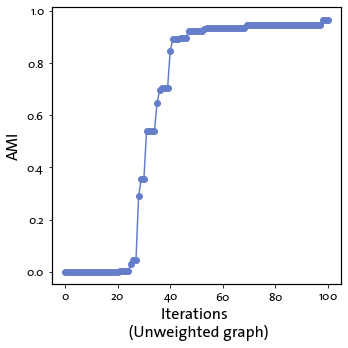

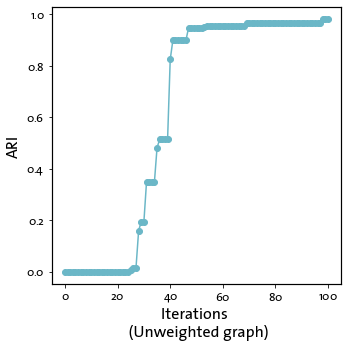

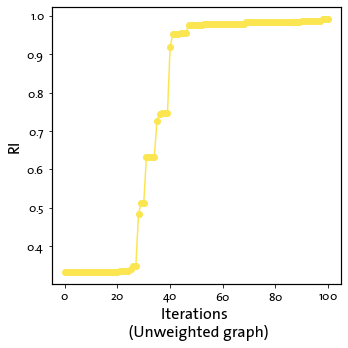

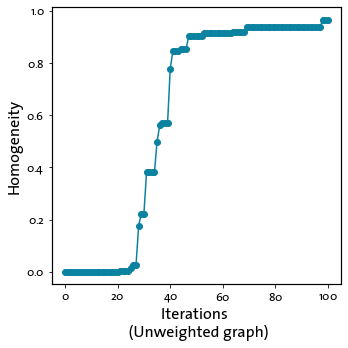

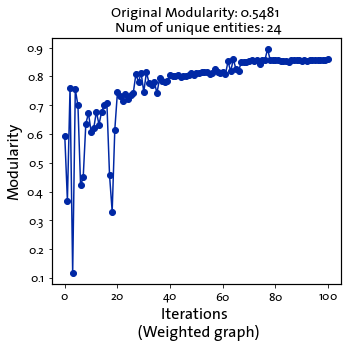

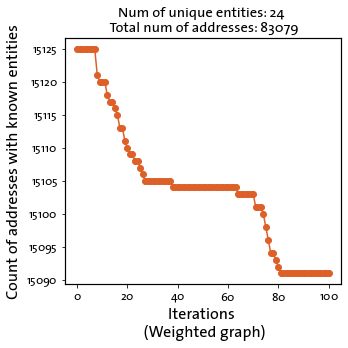

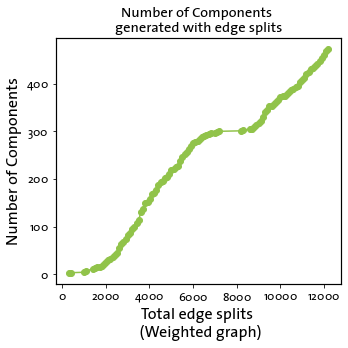

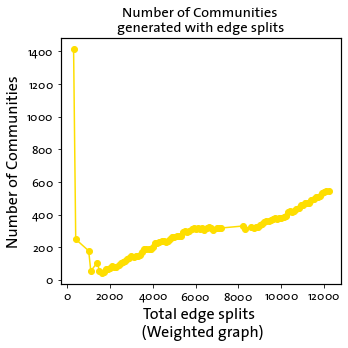

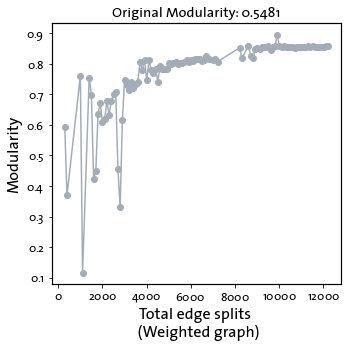

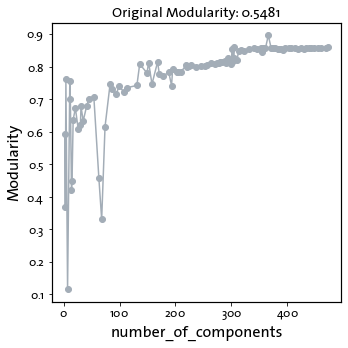

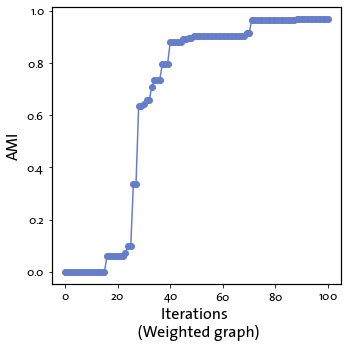

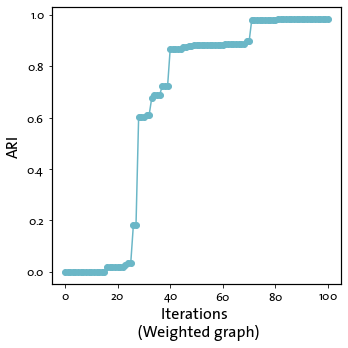

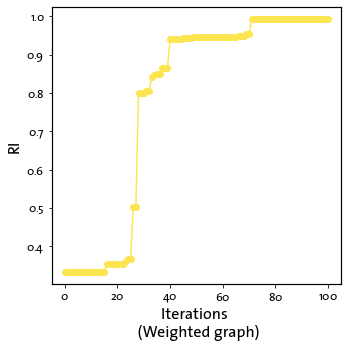

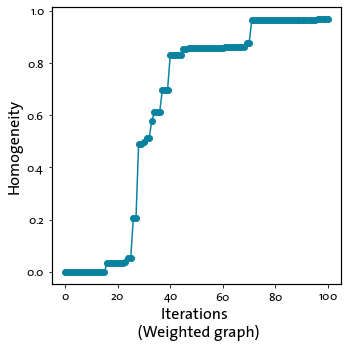

In [49]:

local_logs_path = '/Users/nidhiagrawal/Desktop/Assignments/MastersProject/Github/FINAL/part2_final_logs/gn_logs_final/'
server_logs_path = '/local/scratch/correspondence_network/part2_final_logs/gn_logs/'
weighted = ['unweighted', 'weighted']

# for i in range(9):
for i in [0,1,2,6,7,8]:
    
    dir = local_logs_path + 'btc_2012_' + str(i) + '_logs/'
    
    for wt in weighted:
        
        gen_files_dir = dir + wt + '/' + 'generated_files/'
        fig_dir = dir + wt + '/' + 'figures/'

        all_files = os.listdir(gen_files_dir)
        files = [f for f in all_files if os.path.isfile(gen_files_dir + f)]

        for file in files:
            if '0_modularity.csv' in file:
                print('**** ', file, ' ****')
                name = file.replace('_modularity.csv', '')
                modularity_df = pd.read_csv(gen_files_dir + file)
                # save_dir = fig_dir + name
                save_dir = '/Users/nidhiagrawal/Desktop/Assignments/MastersProject/Github/FINAL/part2_final_logs/only_plots_final/btc_2012_' + str(i) + '_logs/'
                pathlib.Path(save_dir).mkdir(parents=True, exist_ok=True)
                save_dir = save_dir + name
                main(i, wt, modularity_df, save_dir)

